In [1]:
!pip install -U torch torchvision
!git clone https://github.com/Shulin-Zhang/pytorch_models.git

     |████████████████████████████████| 773.1MB 48kB/s s eta 0:00:01                        | 95.6MB 34.2MB/s eta 0:00:20     |██████                          | 144.0MB 35.6MB/s eta 0:00:18     |███████▎                        | 175.9MB 36.8MB/s eta 0:00:17��████▊                     | 259.2MB 29.8MB/s eta 0:00:18     |███████████▌                    | 277.7MB 5.9MB/s eta 0:01:24     |███████████████                 | 364.9MB 32.5MB/s eta 0:00:13     |████████████████▎               | 392.3MB 28.7MB/s eta 0:00:14/s eta 0:00:13     |██████████████████████▍         | 541.7MB 30.7MB/s eta 0:00:08█████████████▏        | 561.0MB 30.7MB/s eta 0:00:07��        | 561.3MB 30.7MB/s eta 0:00:07��█████████████████████████▋  | 716.0MB 25.6MB/s eta 0:00:03�████████████▋  | 716.3MB 25.6MB/s eta 0:00:03
     |████████████████████████████████| 10.1MB 23.7MB/s eta 0:00:01 | 5.4MB 23.7MB/s eta 0:00:01     |██████████████████▊             | 5.9MB 23.7MB/s eta 0:00:01     |███████████████████████▍        |

In [2]:
!ls
!mkdir ./data

__notebook_source__.ipynb  pytorch_models


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
from matplotlib import pylab as plt

from pytorch_models.image_classification import minist
from pytorch_models.image_classification.resnet import Resnet
from pytorch_models.image_classification.resnext import ResNeXt
from pytorch_models.image_classification.learner import Learner
from pytorch_models.utils.lr_finder import Lr_finder

In [4]:
trainloader, testloader = minist.build_minist_loader('./data/minist', batch=64, workers=2)

0it [00:00, ?it/s]

9920512it [00:01, 7638097.41it/s]                            


Extracting ./data/minist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/minist/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 86010.08it/s]            
0it [00:00, ?it/s]

Extracting ./data/minist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/minist/MNIST/raw


1654784it [00:00, 1922964.99it/s]                            
0it [00:00, ?it/s]

Extracting ./data/minist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/minist/MNIST/raw


8192it [00:00, 29003.88it/s]            

Extracting ./data/minist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/minist/MNIST/raw
Processing...
Done!


In [5]:
def plot_batch(loader):
    imgs = next(iter(loader))[0]
    grid = torchvision.utils.make_grid(imgs)
    grid = grid.numpy().transpose([1, 2, 0]) * 255
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(grid)

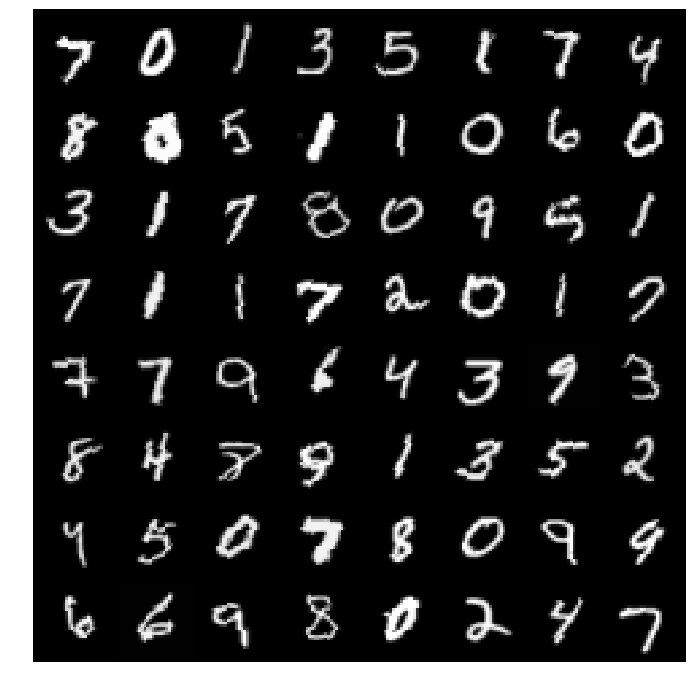

In [6]:
plot_batch(trainloader)

In [7]:
model = Resnet(10, 1, activation=nn.ReLU(True))

In [8]:
lr_finder = Lr_finder(model, trainloader, nn.CrossEntropyLoss(), optim.SGD(model.parameters(), 0.1))

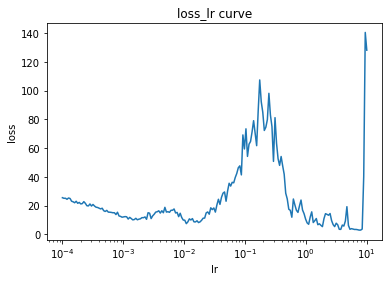

In [9]:
lr_finder.lr_find(steps=200, lr_range=(1e-4, 10), plot=True)

In [11]:
learn = Learner(model)

In [12]:
steps, losses = learn.fit(trainloader, 0.01, 10, weight_decay=0.01, print_steps=200)

epoch: 1    	step: 200    	loss: 0.6329
epoch: 1    	step: 400    	loss: 0.3071
epoch: 1    	step: 600    	loss: 0.9905
epoch: 1    	step: 800    	loss: 0.0844
epoch: 2    	step: 200    	loss: 0.3400
epoch: 2    	step: 400    	loss: 0.0822
epoch: 2    	step: 600    	loss: 0.1460
epoch: 2    	step: 800    	loss: 0.2236
epoch: 3    	step: 200    	loss: 0.0124
epoch: 3    	step: 400    	loss: 0.0453
epoch: 3    	step: 600    	loss: 0.0352
epoch: 3    	step: 800    	loss: 0.0522
epoch: 4    	step: 200    	loss: 0.0945
epoch: 4    	step: 400    	loss: 0.1489
epoch: 4    	step: 600    	loss: 0.0999
epoch: 4    	step: 800    	loss: 0.0485
epoch: 5    	step: 200    	loss: 0.0818
epoch: 5    	step: 400    	loss: 0.1130
epoch: 5    	step: 600    	loss: 0.0517
epoch: 5    	step: 800    	loss: 0.0787
epoch: 6    	step: 200    	loss: 0.1404
epoch: 6    	step: 400    	loss: 0.1791
epoch: 6    	step: 600    	loss: 0.0770
epoch: 6    	step: 800    	loss: 0.0292
epoch: 7    	step: 200    	loss: 0.0475


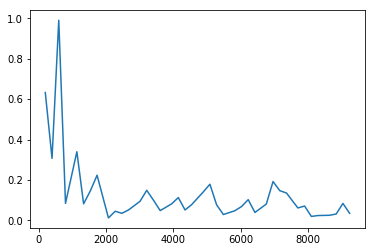

In [15]:
plt.plot(steps, losses)

In [17]:
learn.evaluate(trainloader)

0.9954833333333334

In [16]:
learn.evaluate(testloader)

0.9962